# TEST - UMAP avec les mots du corpus

In [9]:
import spacy
import pandas as pd
import re



df3=pd.read_excel("./Exports/export_topics.xlsx")

nlp = spacy.load("fr_core_news_lg",disable=["ner", "parser"])

In [14]:
topiti = df3[['preprocessed_xpo', 'topics']]

for i, line in enumerate(topiti.preprocessed_xpo):
    line = ''.join(line)
    line = re.sub('\[', ' ', line)
    line = re.sub('\]', ' ', line)
    topiti.preprocessed_xpo[i] = line

len(topiti)

<ipython-input-14-50b62070a8e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topiti.preprocessed_xpo[i] = line
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


472

In [12]:
import numpy as np

vectors={}
vectors_top={}
for i, line in enumerate(topiti.preprocessed_xpo):   
    doc = nlp(line)
    for t in doc:
        if t.has_vector and t not in vectors:
            vectors[t.text]= np.append(t.vector, topiti.topics[i])

In [13]:
words=pd.DataFrame(vectors).transpose()
words.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
France,-1.57960,1.65960,1.88200,1.2595,-1.895500,-0.053563,-1.11790,4.47540,1.88400,-2.53090,...,0.40377,0.31758,1.6909,0.86156,-1.759500,-0.54812,1.044500,-0.92300,0.577850,8.0
",",-0.88809,-0.35001,-0.96216,2.9848,-4.226400,0.360490,2.40190,0.73439,-0.14135,2.03410,...,-2.79690,-3.12150,1.7524,-3.79470,-0.873050,0.23959,0.770750,-0.46836,-0.758650,8.0
signer,2.67420,-1.01230,-1.51920,1.9473,0.935650,-0.177710,1.18170,0.41281,0.29416,0.48641,...,1.54660,0.75270,1.5292,-0.86175,-0.086687,0.72786,0.257690,1.06950,-0.129340,8.0
Paris,-2.82400,3.52460,2.60740,-0.1950,-3.590700,-2.338000,-0.99063,1.11750,0.98361,0.46011,...,-0.98273,0.77048,1.7663,-0.64317,-1.368800,-2.01600,0.988540,0.58811,0.091463,4.0
accord,0.67124,-1.34590,1.14730,2.9060,-0.032454,-0.651080,-1.06680,1.73670,2.13780,1.44330,...,1.06800,-1.20800,3.7835,2.40180,-2.128200,0.44457,-0.069453,-0.36520,2.020600,11.0


<AxesSubplot:xlabel='0', ylabel='1'>

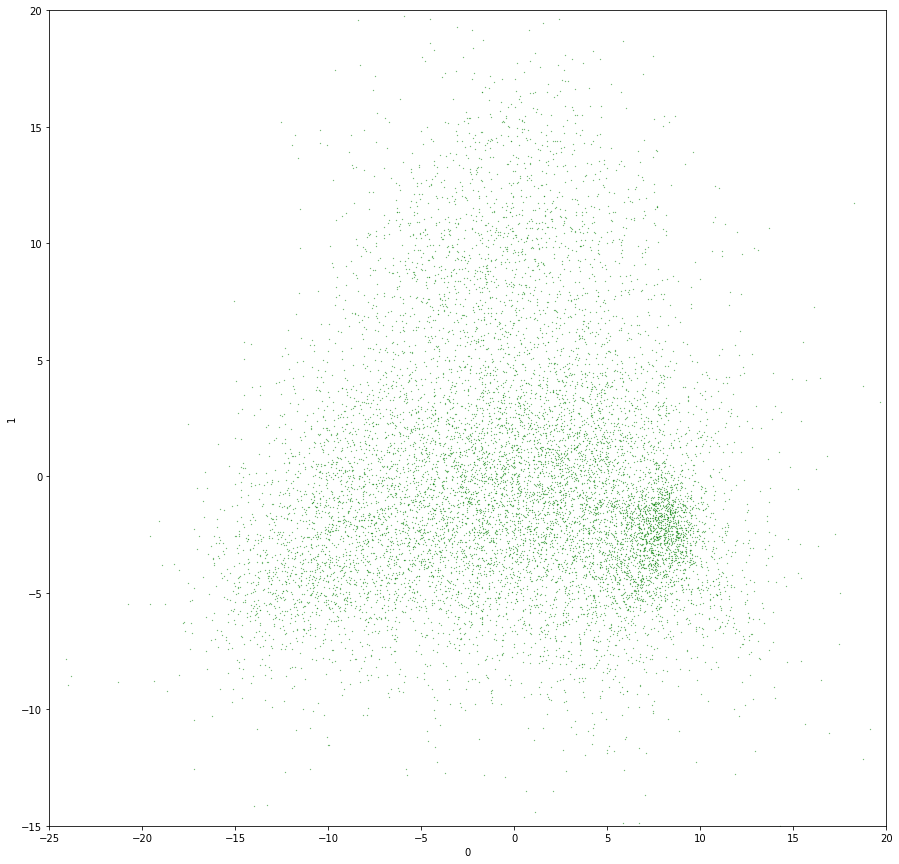

In [30]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

vec=words.iloc[:,:300]

pca=PCA()
resPCA=pca.fit_transform(vec)
resPCA=pd.DataFrame(resPCA)
resPCA.index=words.index
resPCA['topics'] = words.iloc[:,300]
resPCA.plot.scatter(x=0,y=1,s=.05,figsize=(15,15), xlim=(-25,20), ylim=(-15,20), c='green')

<BarContainer object of 300 artists>

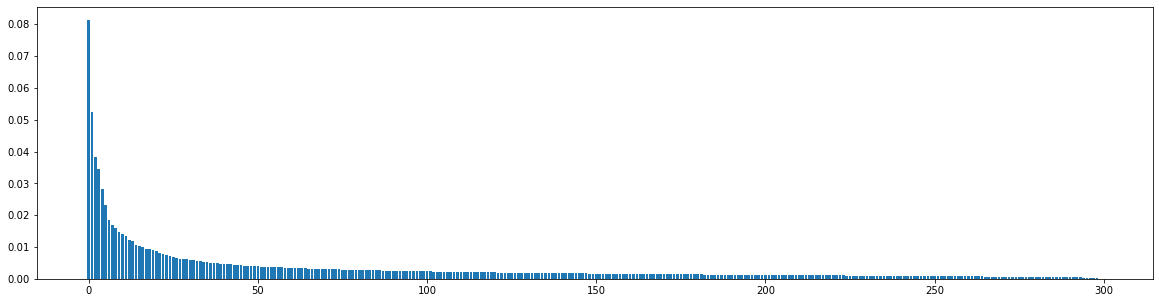

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

In [21]:
umap=UMAP(n_neighbors=100, min_dist=.5)
resUMAP=umap.fit_transform(words.iloc[:,:300])
resUMAP=pd.DataFrame(resUMAP)
resUMAP.index=words.index
resUMAP['topics'] = words.iloc[:,300]

[ 8.  4. 11. 18.  3.  0.  1. 15. 19.  9.  6. 13. 16. 14. 17. 10. 12.  7.
  5.  2.]


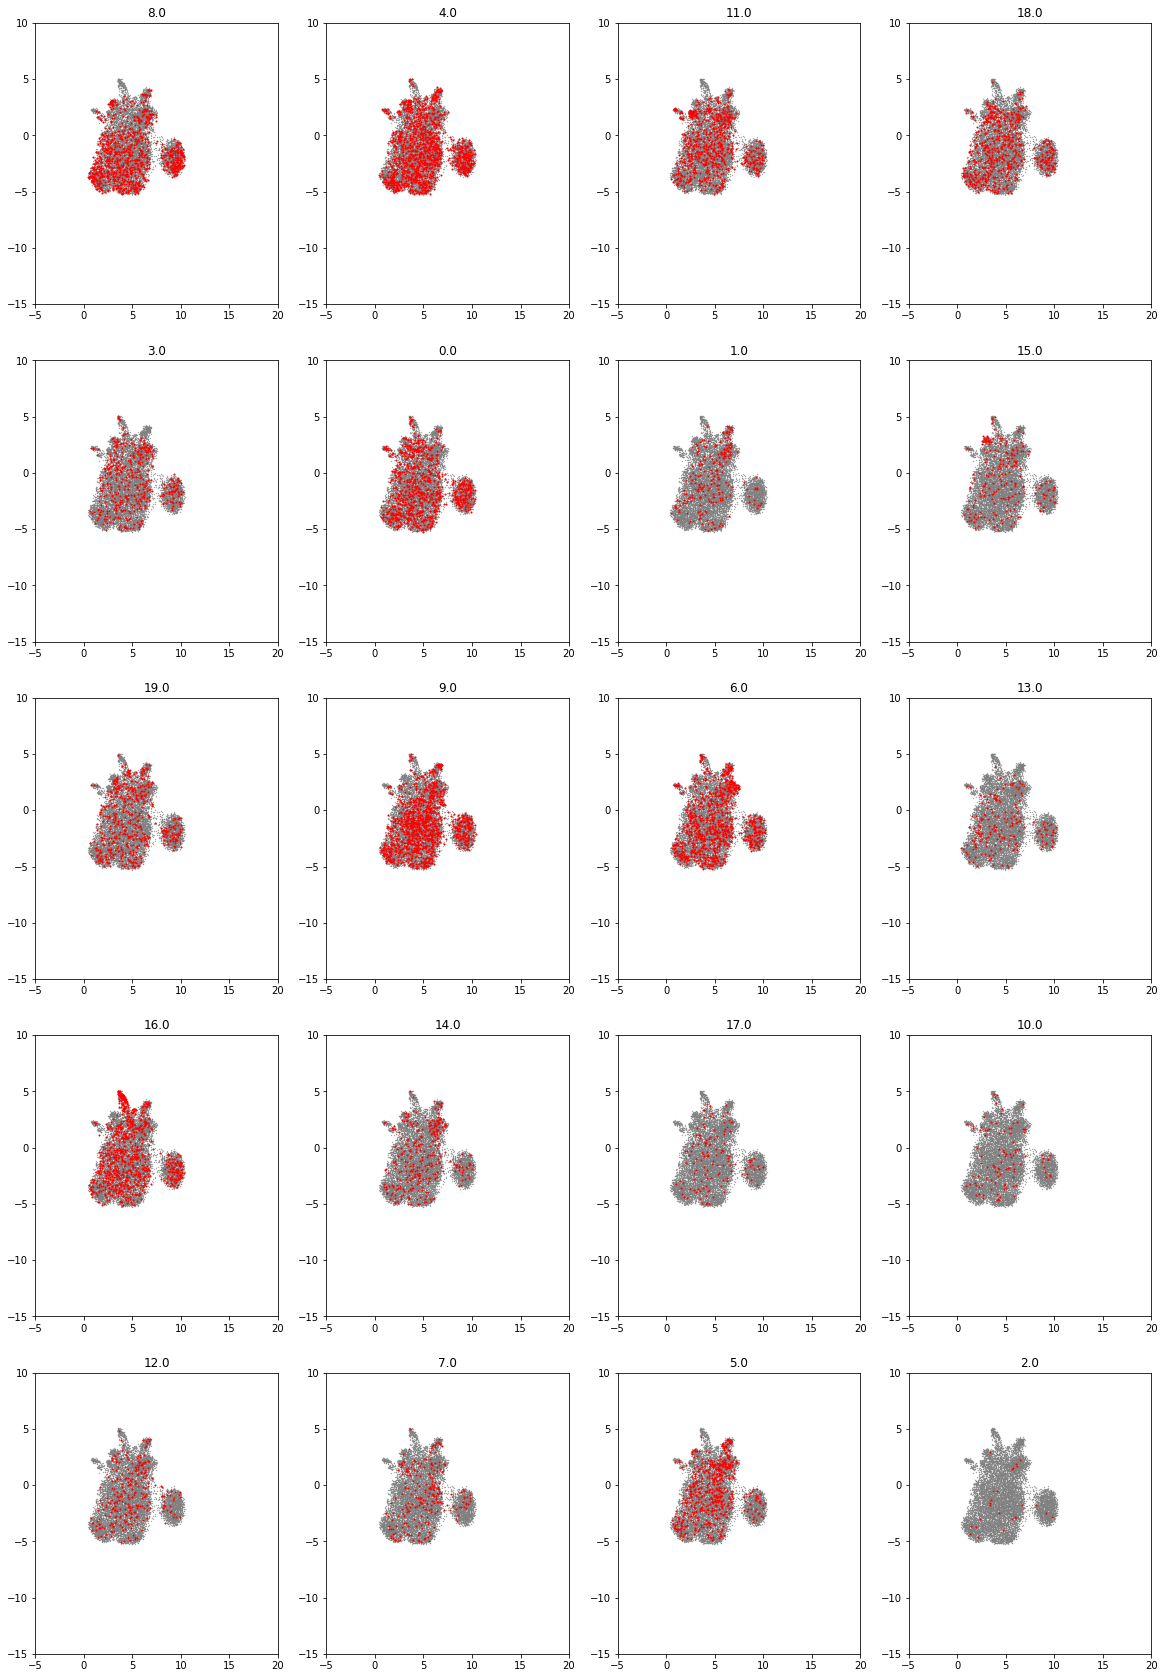

In [22]:
fig,axis=plt.subplots(5,4,figsize=(20,30))
axis=axis.flatten()

topics=words.iloc[:,300].unique()
print(topics)

for i, top in enumerate(topics):
    topic = top
    resUMAP_topics=resUMAP[resUMAP.topics==topic]
    axis[i].scatter(resUMAP[0],resUMAP[1],s=.1, c='gray')
    axis[i].scatter(resUMAP_topics[0],resUMAP_topics[1],s=1, color='red')
    axis[i].set_title(topic)
    axis[i].set_xlim((-5,20))
    axis[i].set_ylim((-15,10))

# Test avec CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

